HW1. 위에 Multinomial Naive Bayes Classifier 예시 해보기

In [115]:
from IPython.display import Image #사진첨부를 위함

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

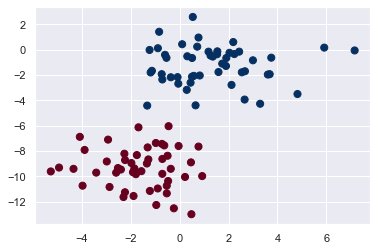

In [116]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu'); #s는 마커의 크기/ c는 마커의 색상 / 
                                                       #cmap: c에서 넘겨받은 값들을 cmap에 맞춰 변형해서 색깔을 적용

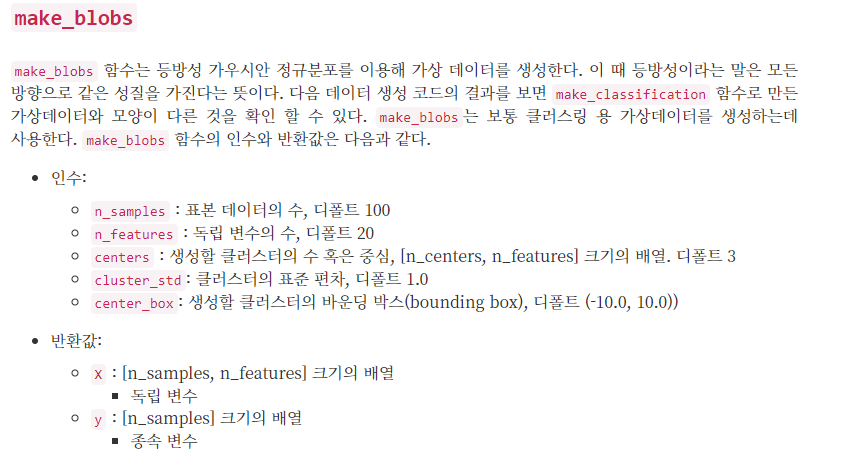

In [117]:
Image(filename="1.png")

In [118]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [119]:
#generate some new data and predict the label:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

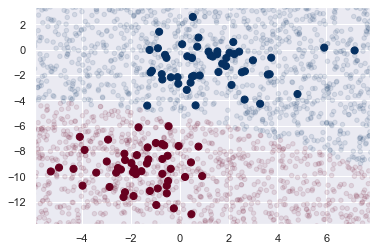

In [120]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1) #alpha가 0이면 투명 / 1이면 불투명
plt.axis(lim);

In [121]:
#predict_proba의 출력은 각 클래스에 대한 확률

yprob = model.predict_proba(Xnew)
print(yprob.shape)
yprob[-8:].round(2) #뒤의 행부터 8개 뽑기

(2000, 2)


array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

Multinomial Naive Bayes

In [122]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names #글의 종류

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [123]:
#train/test split
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [124]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

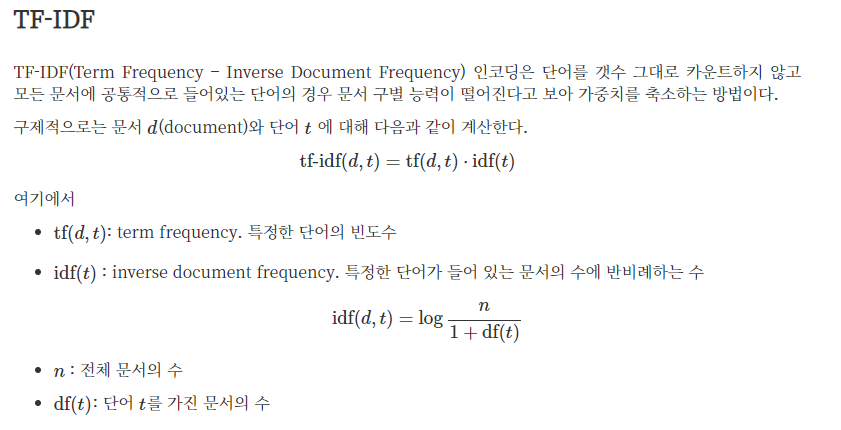

In [126]:
Image(filename="2.png")

In [127]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

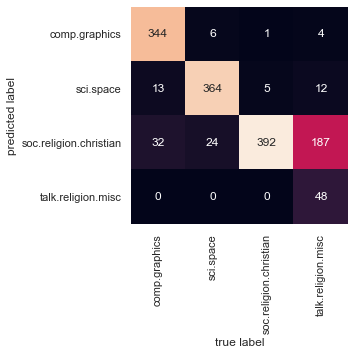

In [128]:
#분류 성능 결과를 표로 나타내어보자!
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
#talk.religion.misc 빼고 잘 맞아떨어진다.

In [129]:
#글을 입력했을 때 어떠한 종류의 글인지 예측해보자!

def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [130]:
predict_category('sending a payload to the ISS')

'sci.space'

In [131]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [132]:
predict_category('determining the screen resolution')

'comp.graphics'

HW2-선택 1

1. 데이터 전처리 및 시각화

In [133]:
from sklearn.datasets import load_wine
wine = load_wine() #와인의 화학 조성을 사용하여 와인의 종류를 예측하기 위한 데이터
import numpy as np
import pandas as pd
wine.data
#특징 데이터

    #알콜(Alcohol)
    #말산(Malic acid)
    #회분(Ash)
    #회분의 알칼리도(Alcalinity of ash)
    #마그네슘(Magnesium)
    #총 폴리페놀(Total phenols)
    #플라보노이드 폴리페놀(Flavanoids)
    #비 플라보노이드 폴리페놀(Nonflavanoid phenols)
    #프로안토시아닌(Proanthocyanins)
    #색상의 강도(Color intensity)
    #색상(Hue)
    #희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)
    #프롤린(Proline)

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [134]:
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
y=df['class']#lda/qda plot 그리기 위해 지정
df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,class_2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,class_2


In [135]:
# 결측치 확인
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

In [ ]:
#feature selection
fig, ax = plt.subplots(figsize=(10,10))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, ax=ax, cmap='bwr')
plt.show()

In [ ]:
#corr가 높은 변수들을 제거해주자.

# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

X = df[df.columns.difference(['class'])]
Y = df['class']

# feature extraction
test = SelectKBest(score_func=f_classif, k=5)
fit = test.fit(X, Y)

# summarize scores
set_printoptions(precision=3) #소수점 셋째자리까지만 출력 
print(fit.scores_)

#socre 상위 5개만 뽑아 쓰자
print(df.columns[[1,3,4,9,11],])

features = fit.transform(X)

# summarize selected features
print(features[0:5,:])

In [ ]:
#선택된 변수들의 corr matrix 를 그려보자
X = df[['malic_acid', 'alcalinity_of_ash', 'magnesium', 'color_intensity', 'od280/od315_of_diluted_wines']]
#말산(Malic acid) 회분의 알칼리도(Alcalinity of ash) 마그네슘(Magnesium) 색상의 강도(Color intensity) 
#희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)
Y = df['class']

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(X.corr(), annot=True, ax=ax, cmap='bwr')
plt.show()

In [ ]:
#데이터 분포 보고
sns.pairplot(vars=['malic_acid', 'alcalinity_of_ash', 'magnesium', 'color_intensity', 'od280/od315_of_diluted_wines'], 
             hue="class", data=df)
plt.show()
#변수 선택이 잘 된 것 같다.

2. Train/Test set split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100, stratify=Y) 
#stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.
print(X_train.shape)
print(X_test.shape)

3. Test에 다음의 모델을 fit해보기

A. LDA/QDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf_lda = LinearDiscriminantAnalysis().fit(X_train, Y_train)
print('LDA train Error: ', clf_lda.score(X_train,Y_train))

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_qda = QuadraticDiscriminantAnalysis().fit(X_train,Y_train)
print('QDA train Error: ', clf_qda.score(X_train,Y_train))

cf)lda n_components 참조

(1) https://books.google.co.kr/books?id=CDWuDwAAQBAJ&pg=PA250&lpg=PA250&dq=lineardiscriminantanalysis+n_components&source=bl&ots=wer7ZV-F_U&sig=ACfU3U0nugVqDeugpv9NagC9q799cJvcTQ&hl=ko&sa=X&ved=2ahUKEwiQk8Lyq_noAhUoyosBHTAoC7AQ6AEwCHoECAoQAQ#v=onepage&q=lineardiscriminantanalysis%20n_components&f=false

(2) Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction. If None, will be set to min(n_classes - 1, n_features).

cf)LDA 그림

In [ ]:
lda.explained_variance_ratio_

In [ ]:
# Create and run an LDA
lda = LinearDiscriminantAnalysis(n_components=4)
X_lda = lda.fit(X, y)

# Create array of explained variance ratios
lda_var_ratios = lda.explained_variance_ratio_

# Create a function
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

In [ ]:
# Run function (2개의 feature로 분산의 95%가 넘게 설명된다.)
select_n_components(lda_var_ratios, 0.95)

In [ ]:
print(__doc__)

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = wine.data
y = wine.target
target_names = wine.target_names

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(lda.explained_variance_ratio_))

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of wine dataset')

plt.show()

B. Logistic Regression

로지스틱 회귀 알고리즘을 사용하기 전에는 반드시 데이터를 정규화(Normalization) 해줘야 한다??
:
(대충 정리하면)
regularization 쓸거면, scaling 해주자.
안쓰더라도 scaling 해주면, converge 속도가 증가 + 해석 편리

(참조)
Standardization isn't required for logistic regression. The main goal of standardizing features is to help convergence of the technique used for optimization. For example, if you use Newton-Raphson to maximize the likelihood, standardizing the features makes the convergence faster. Otherwise, you can run your logistic regression without any standardization treatment on the features.

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the data set to use a common scale, without distorting differences in the ranges of values or losing information. Normalization is required for some algorithms to model the data correctly.
In logistics numeric features should be normalized so that each feature contributes approximately proportionately to the final distance. This can provide significant speedup and accuracy benefits. When using the Logistic Regression and Averaged Perception algorithms, by default, features are normalized.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#fit_transform 은 fit과 transform을 합친 건데, fit은 일단 각 속성(feature)마다 컬럼을 만드는 작업이라고 생각하면 된다. 
#이후 transform을 통해 데이터를 변형시키는 거다.
#그래서 위 코드에서도 학습세트로 fit을 한 번 해주었기 때문에, 평가세트에서는 별도로 fit을 할 필요 없이 바로 transform하면 되는 거다.

In [ ]:
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(solver='sag', max_iter=500)
model_log.fit(X_train_scaled, Y_train)
print(model_log.score(X_train_scaled, Y_train))
print(model_log.coef_)

#logistic regression(option 설명): https://computer-nerd.tistory.com/66
#solver(최적화에 사용할 알고리즘 결정) :https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-defintions
#max_iter:solver가 수렴하게 만드는, 최대반복 횟수값

solver? max_iter? 로지스틱 회귀의 MLE를 찾는 방법이 iterative하게 최적화 문제를 푸는 문제다보니 sklearn은 사용자가 어떤 알고리즘으로 몇 번 반복할 것인지 선택할 수 있게 했다. 클래스가 바이너리냐 멀티이냐, 데이터가 많냐 적냐에 따라 무엇이 나은지 다르니 아래를 읽어보고 잘 골라보자. - 갓경훈

In [ ]:
Image(filename="3.png")

C. Logistic Regression with feature expansion (kcv로 차수 결정)

In [ ]:
#degree 정하기
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

model = LogisticRegression(solver='sag', max_iter=1000)
cv = KFold(5, shuffle=True, random_state=0)
for i in range(1, 5):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)

    print(cross_val_score(model, X_train_poly_scaled, Y_train, scoring="accuracy", cv=cv).mean())

In [ ]:
Image(filename="4.png")

In [ ]:
#큰 차이는 없지만 3차가 되면서 정확도가 좀 더 크게 증가하니, 3차로 하자.
poly = PolynomialFeatures(degree=3, include_bias=False) # No column of 1s
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

X_train_poly_scaled = scaler.fit_transform(X_train_poly)
X_test_poly_scaled = scaler.fit_transform(X_test_poly)

model_log_wfe = LogisticRegression(solver='sag', max_iter=500)
model_log_wfe.fit(X_train_poly_scaled, Y_train)
print(model_log_wfe.score(X_train_poly_scaled, Y_train))

4. 각 모델에 대해 Test score 보고하고 결과 해석하기

In [ ]:
print('LDA test score: ', round(clf_lda.score(X_test,Y_test),4))
print('QDA test score: ', round(clf_qda.score(X_test,Y_test),4))

print('Logistic Reg test score: ', round(model_log.score(X_test_scaled, Y_test),4))
print('Logistic Reg With Feature Extraction test score: ', round(model_log_wfe.score(X_test_poly_scaled, Y_test),4))

QDA가 가장 정확 - sample data의 수가 충분하지 않아서 이런 결과가 나온 것으로 예상됨.